In [2]:
from pathlib import Path
import rasterio as rio
from matplotlib import pyplot as plt
from omnicloudmask import (
    predict_from_load_func,
    load_s2,
)
from s2dl import fetch_single_sentinel_product

In [3]:
test_data_dir = Path("test data")
test_data_dir.mkdir(exist_ok=True, parents=True)

In [4]:
product_id = "S2A_MSIL1C_20230304T020441_N0509_R017_T50HNH_20230304T051523"
scene_dir = fetch_single_sentinel_product(product_id, test_data_dir)
scene_dir

PosixPath('test data/S2A_MSIL1C_20230304T020441_N0509_R017_T50HNH_20230304T051523.SAFE')

In [5]:
pred_paths = predict_from_load_func(
    scene_paths=[scene_dir], load_func=load_s2, batch_size=4, inference_dtype="bf16"
)

Loading PM_model_2.2.10_RG_NIR_509_convnextv2_nano.fcmae_ft_in1k_PT.pth
Loading PM_model_2.2.10_RG_NIR_509_regnety_004.pycls_in1k_PT.pth


Running inference using cuda bfloat16:   0%|          | 0/1 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


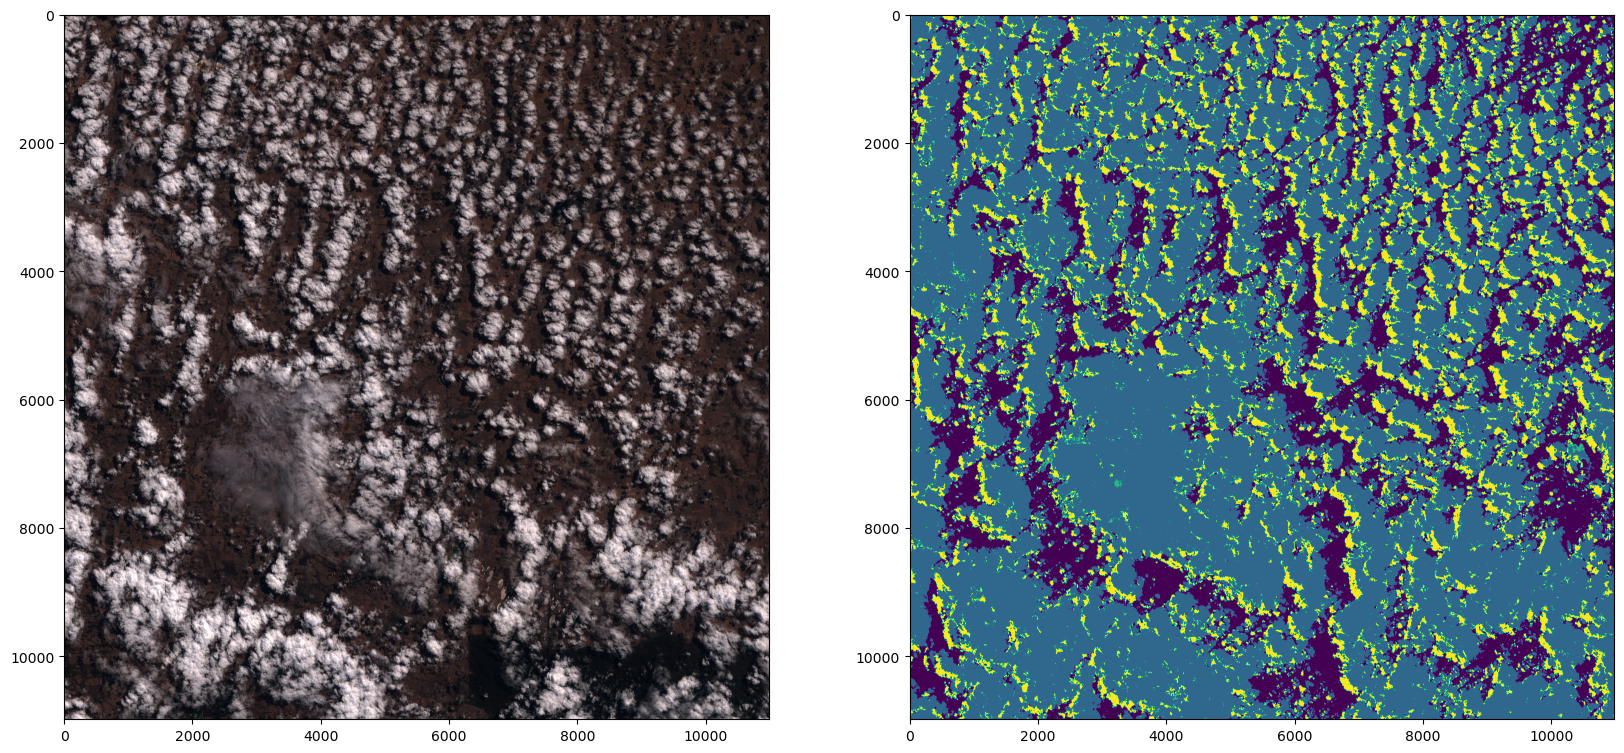

In [26]:
scene_RGB = load_s2(scene_dir, required_bands=["B04", "B03", "B02"])[0].astype(
    "float32"
)
scene_RGB -= scene_RGB.min()
scene_RGB /= scene_RGB.max() * 0.7

pred_array = rio.open(pred_paths[0]).read(1)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(scene_RGB.transpose(1, 2, 0))
ax[1].imshow(pred_array)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


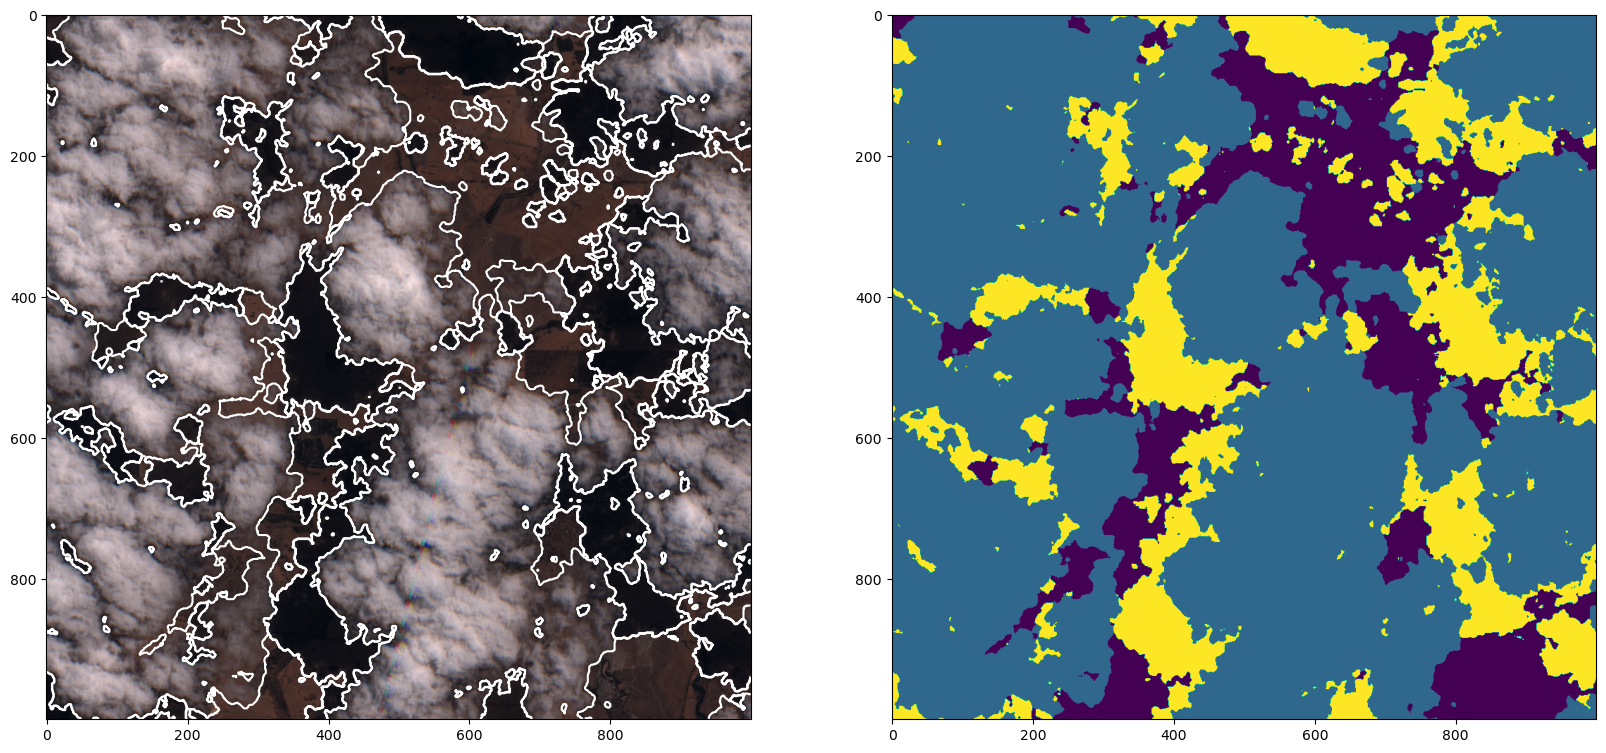

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(scene_RGB.transpose(1, 2, 0)[:1000, :1000, :])
ax[0].contour(pred_array[:1000, :1000], levels=[0, 1, 2, 3], colors="w")
ax[1].imshow(pred_array[:1000, :1000])